# Proyecto Final

## Regresión Lineal univariable

### 1. Cargar Librerías

In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.linear_model import LinearRegression

### 2. Cargar Información

In [227]:
data = pd.DataFrame(np.load('proyecto_training_data.npy'))
data=data.set_axis(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'], axis=1)
rowCount = data.shape[0]

#### 2.1 Dividiendo datos para entrenamiento y para validación

In [228]:
trainingDataPercentage = 0.8

IsTrainingData = np.random.choice([0,1], p=[1-trainingDataPercentage, trainingDataPercentage], size=(rowCount))

while(np.sum(IsTrainingData) == np.ceil(rowCount*trainingDataPercentage)):
    IsTrainingData = np.random.choice([0,1], p=[1-trainingDataPercentage, trainingDataPercentage], size=(rowCount))
    
data['training']=IsTrainingData

trainingData = data.loc[data['training'] == 1]
validationData = data.loc[data['training'] == 0]

### 3. Análisis Exploratorio

In [229]:
stats = pd.DataFrame({
    'Variable':pd.Series(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']),
    'Media':pd.Series([np.nanmean(trainingData['SalePrice']), np.nanmean(trainingData['OverallQual']), np.nanmean(trainingData['1stFlrSF']), np.nanmean(trainingData['TotRmsAbvGrd']), np.nanmean(trainingData['YearBuilt']), np.nanmean(trainingData['LotFrontage'])]),
    'Valor Máximo':pd.Series([np.nanmax(trainingData['SalePrice']), np.nanmax(trainingData['OverallQual']), np.nanmax(trainingData['1stFlrSF']), np.nanmax(trainingData['TotRmsAbvGrd']), np.nanmax(trainingData['YearBuilt']), np.nanmax(trainingData['LotFrontage'])]),
    'Valor Mínimo':pd.Series([np.nanmin(trainingData['SalePrice']), np.nanmin(trainingData['OverallQual']), np.nanmin(trainingData['1stFlrSF']), np.nanmin(trainingData['TotRmsAbvGrd']), np.nanmin(trainingData['YearBuilt']), np.nanmin(trainingData['LotFrontage'])]),
    'Rango':pd.Series([np.ptp(trainingData['SalePrice']), np.ptp(trainingData['OverallQual']), np.ptp(trainingData['1stFlrSF']), np.ptp(trainingData['TotRmsAbvGrd']), np.ptp(trainingData['YearBuilt']), np.nanmax(trainingData['LotFrontage'])-np.nanmin(trainingData['LotFrontage']) ]),
    'Desviación Estándar':pd.Series([np.nanstd(trainingData['SalePrice']), np.nanstd(trainingData['OverallQual']), np.nanstd(trainingData['1stFlrSF']), np.nanstd(trainingData['TotRmsAbvGrd']), np.nanstd(trainingData['YearBuilt']), np.nanstd(trainingData['LotFrontage'])]),
})
stats

,Variable,Media,Valor Máximo,Valor Mínimo,Rango,Desviación Estándar
0,SalePrice,180716.896070,755000.0,34900.0,720100.0,79272.168622
1,OverallQual,6.082969,10.0,1.0,9.0,1.390899
2,1stFlrSF,1162.907424,4692.0,334.0,4358.0,393.006679
3,TotRmsAbvGrd,6.508297,14.0,2.0,12.0,1.643346
4,YearBuilt,1970.396507,2010.0,1872.0,138.0,30.177119
5,LotFrontage,70.160981,313.0,21.0,292.0,22.915453


### 4. Histogramas

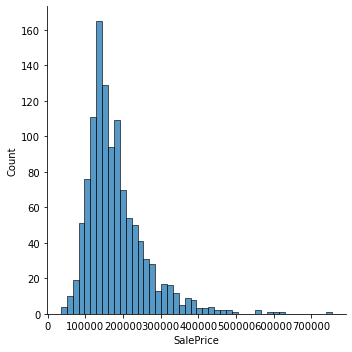

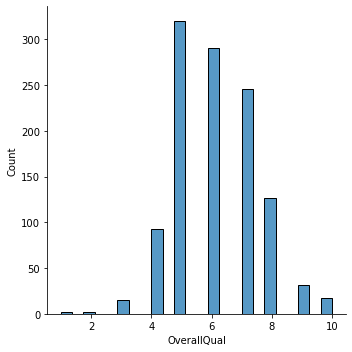

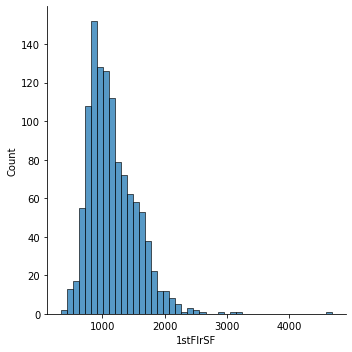

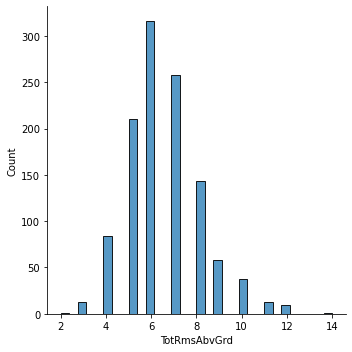

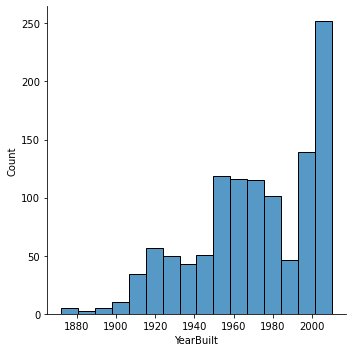

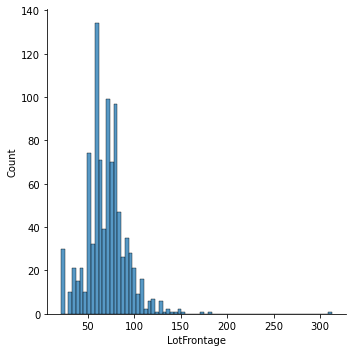

In [230]:
sns.displot(trainingData['SalePrice'])
sns.displot(trainingData['OverallQual'])
sns.displot(trainingData['1stFlrSF'])
sns.displot(trainingData['TotRmsAbvGrd'])
sns.displot(trainingData['YearBuilt'])
sns.displot(trainingData['LotFrontage'])

### 5. Correlaciones

#### Overall Quality

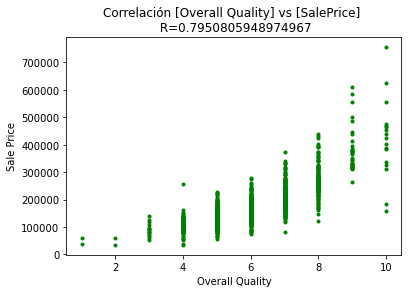

In [231]:
R_OverallQual = np.corrcoef(trainingData['SalePrice'], trainingData['OverallQual'])[0,1]
plt.scatter(trainingData['OverallQual'], trainingData['SalePrice'], color='g', marker='.')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title(f'Correlación [Overall Quality] vs [SalePrice] \n R={R_OverallQual}')
plt.show()

#### First Floor Area

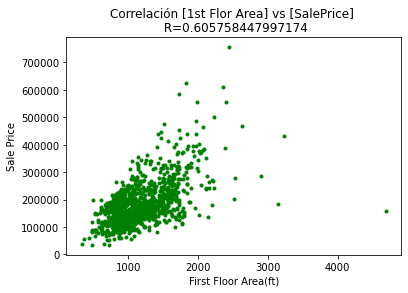

In [232]:
R_1stFlrSF = np.corrcoef(trainingData['SalePrice'], trainingData['1stFlrSF'])[0,1]
plt.scatter(trainingData['1stFlrSF'], trainingData['SalePrice'], color='g', marker='.')
plt.xlabel('First Floor Area(ft)')
plt.ylabel('Sale Price')
plt.title(f'Correlación [1st Flor Area] vs [SalePrice] \n R={R_1stFlrSF}')
plt.show()

#### Total Rooms above grade

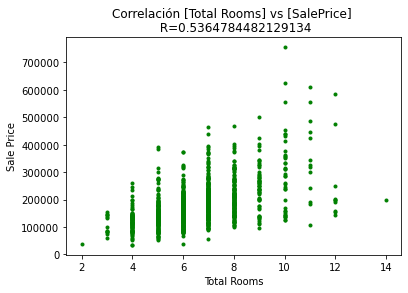

In [233]:
R_TotRmsAbvGrd = np.corrcoef(trainingData['SalePrice'], trainingData['TotRmsAbvGrd'])[0,1]
plt.scatter(trainingData['TotRmsAbvGrd'], trainingData['SalePrice'], color='g', marker='.')
plt.xlabel('Total Rooms')
plt.ylabel('Sale Price')
plt.title(f'Correlación [Total Rooms] vs [SalePrice] \n R={R_TotRmsAbvGrd}')
plt.show()

#### Original construction date

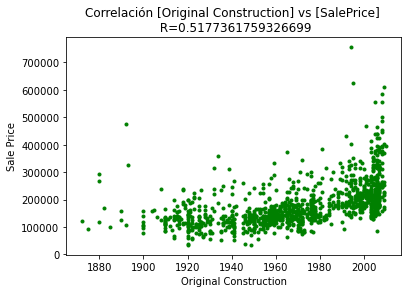

In [234]:
R_YearBuilt = np.corrcoef(trainingData['SalePrice'], trainingData['YearBuilt'])[0,1]
plt.scatter(trainingData['YearBuilt'], trainingData['SalePrice'], color='g', marker='.')
plt.xlabel('Original Construction')
plt.ylabel('Sale Price')
plt.title(f'Correlación [Original Construction] vs [SalePrice] \n R={R_YearBuilt}')
plt.show()

#### Linear feet of street connected to property

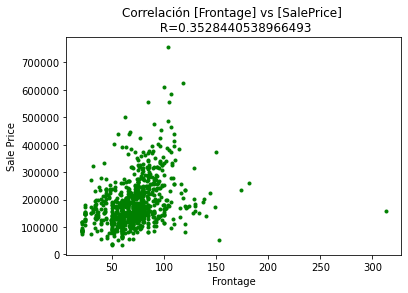

In [235]:
FrontageData = trainingData.loc[:,('SalePrice', 'LotFrontage')]
FrontageData.dropna(inplace=True)
R_LotFrontage = np.corrcoef(FrontageData['SalePrice'], FrontageData['LotFrontage'])[0,1]
plt.scatter(FrontageData['LotFrontage'], FrontageData['SalePrice'], color='g', marker='.')
plt.xlabel('Frontage')
plt.ylabel('Sale Price')
plt.title(f'Correlación [Frontage] vs [SalePrice] \n R={R_LotFrontage}')
plt.show()

#### Comparación Correlaciones

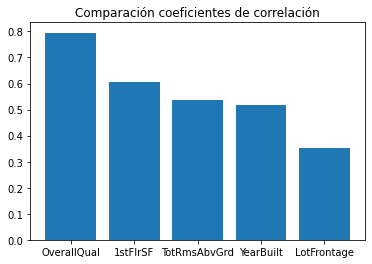

In [236]:
labels = np.array(['OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
values = np.array([
    np.corrcoef(trainingData['SalePrice'], trainingData['OverallQual'])[0,1],
    np.corrcoef(trainingData['SalePrice'], trainingData['1stFlrSF'])[0,1],
    np.corrcoef(trainingData['SalePrice'], trainingData['TotRmsAbvGrd'])[0,1],
    np.corrcoef(trainingData['SalePrice'], trainingData['YearBuilt'])[0,1],
    np.corrcoef(FrontageData['SalePrice'], FrontageData['LotFrontage'])[0,1]
])

plt.bar(labels, values)
plt.title('Comparación coeficientes de correlación')
plt.show()

### 6. Desarrollo de funciones

Consdierando la redacción del proyecto, la clase se desarrolla con métodos estáticos para ser llamados de forma individual  
sin necesidad de instanciar la clase

In [476]:
class myGradeDescend:
    @staticmethod    
    def calculateModels(x, y, epochs, periodoError, learningRate):
        #define return structures
        models, err = [], []

        #define operational variables
        currentError, currentGradients = 0, 0

        #format data for matricial operations
        betas, x, y = np.array([[0], [0]]), np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)
        m = np.hstack([x, np.ones_like(x)])

        for i in range(epochs+1):                                     #iterating based on epochs
            ydif = np.matmul(m, betas)-y                              #calculating difference between predicted 'y' and 'y'
            currentError = np.nanmean((ydif)**2)                      #calculating error
            err.append(currentError)                                  #adding it to a list        
            currentGradients = (m*ydif).mean(axis=0).reshape(-1, 1)   #gradient vector
            betas = betas-(currentGradients*learningRate)             #update betas
            models.append(betas.reshape(1,-1))                        #store model
            if(i % periodoError == 0):
                print(f'iteración: {i}, Error: {currentError}')
        print(f'Model found: B0:{betas[1]}, B1:{betas[0]}')

        return models, err
    
    @staticmethod
    def graphErrorEvolution(err): 
        err = np.array(err).reshape(-1)    
        x = np.linspace(0, err.size, err.size)    
        plt.plot(x, err)
        plt.title('Error Evolution')
        plt.ylabel('Squared difference')
        plt.xlabel('Iterations')
        plt.show()
    
    @staticmethod
    def graphModelEvolution(x, models, n):
        xFirst, xLast = np.nanmin(x), np.nanmax(x)
        models = np.array(models)
        plt.title('Model Evolution')
        plt.xlabel('Independent Variable')
        plt.ylabel('Predictions')
        for i in range(0, models.shape[0]-1, n):        
            independent = np.array([xFirst, xLast])
            dependent = np.array([
                np.dot(models[i], np.array([xFirst, 1]))[0],
                np.dot(models[i], np.array([xLast, 1]))[0],
            ])                
            plt.plot(independent, dependent)
        plt.show()

### 7. Utilzando la clase desarrollada

#### 7.1 Usando clase con OverallQual

iteración: 0, Error: 38942673243.14236
iteración: 1000, Error: 2343414459.156227
iteración: 2000, Error: 2311629089.761622
iteración: 3000, Error: 2311578056.6243525
iteración: 4000, Error: 2311577812.693384
iteración: 5000, Error: 2311577810.9215508
Model found: B0:[-94928.67616961], B1:[45314.31627802]


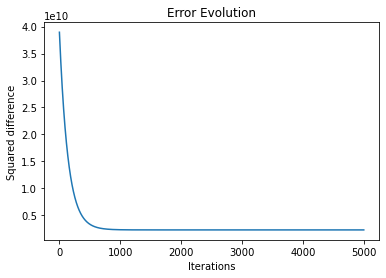

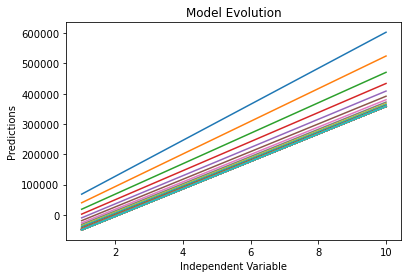

In [520]:
OverallQualModels, OverallQualErrors = myGradeDescend.calculateModels(trainingData['OverallQual'], trainingData['SalePrice'], 5000, 1000, 0.05005)
myGradeDescend.graphErrorEvolution(OverallQualErrors)
myGradeDescend.graphModelEvolution(trainingData['OverallQual'], OverallQualModels, 100)

#### 7.2 Usando clase con 1stFlrSF

iteración: 0, Error: 38942673243.14236
iteración: 50000, Error: 4134295432.183877
iteración: 100000, Error: 4127006763.8120623
iteración: 150000, Error: 4124994882.537491
iteración: 200000, Error: 4123010968.371909
Model found: B0:[1036.96013814], B1:[151.19593693]


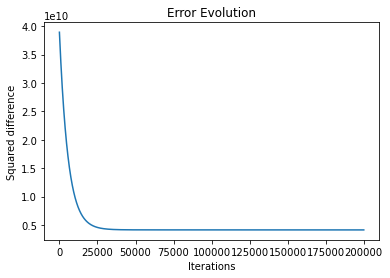

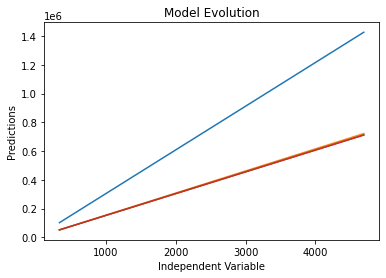

In [626]:
FirstFloorModels, FirstFloorErrors = myGradeDescend.calculateModels(trainingData['1stFlrSF'], trainingData['SalePrice'], 200000, 50000, 0.00000132725)
myGradeDescend.graphErrorEvolution(FirstFloorErrors)
myGradeDescend.graphModelEvolution(trainingData['1stFlrSF'], FirstFloorModels, 50000)

### 8. Modelos con scikit

#### 8.1 Scikit-Learn  Overall Qual

In [521]:
OverallQual_Model = LinearRegression()
OverallQual_Model.fit(np.array(trainingData['OverallQual']).reshape(-1, 1), np.array(trainingData['SalePrice']).reshape(-1, 1))
OverallQual_Model.get_params()
print(f'Scikit-Learn Model B0:{OverallQual_Model.intercept_} B1:{OverallQual_Model.coef_}')

Scikit-Learn Model B0:[-94929.20059338] B1:[[45314.39780035]]


#### 8.2 Scikit-Learn 1stFlrSF

In [522]:
FirstFloor_Model = LinearRegression()
FirstFloor_Model.fit(np.array(trainingData['1stFlrSF']).reshape(-1, 1), np.array(trainingData['SalePrice']).reshape(-1, 1))
FirstFloor_Model.get_params()
print(f'Scikit-Learn Model B0:{FirstFloor_Model.intercept_} B1:{FirstFloor_Model.coef_}')

Scikit-Learn Model B0:[38626.26918883] B1:[[122.1856736]]


In [563]:
class my_regression:
    
    def __init__(self, _X, _Y):
        #properties data containers
        self.__X =[]
        self.__Y =[]
        self.__n = -1
        self.__B0 = -1
        self.__B1 = -1
        self.__r2 = -1
        self.__regressionCalculated = False
        
        self.X = _X
        self.Y = _Y
        
        self.__calculateRegression()
    
    @classmethod
    def from_file(self, path):
        file = open(path, "r")
        i = 0
        X = []
        Y = []
        for line in file:
            i += 1
            line = line.strip()
            vals = line.split(",")
            if(len(vals) != 2):
                raise Exception(f"file format is not correct line {i}")
            X.append(float(vals[0]))
            Y.append(float(vals[1]))
        
        return self(X, Y)
        

    def __validateList(self, inList):
        if(type(inList) is not list):
            raise TypeError("Data parameter must be list type")
        if(not inList):
            raise Exception("Data list cannot be empty")
        
    def __validateInput(self, inList):
        self.__validateList(inList)        
        if(self.__n == -1):
            self.__n = len(inList)
        elif (self.__n != len(inList)):
            raise Exception("Data sets lenght does not match, please check input data")
        
        self.__regressionCalculated = False    
    
    def __calculateRegression(self):
        avgX = sum(self.X)/self.__n
        avgY = sum(self.Y)/self.__n
        sumXY = sum([self.X[i]*self.Y[i] for i in range(self.__n)])        
        
        self.__B0 = (sumXY-self.__n*avgX*avgY)/(sum([x**2 for x in self.X])-self.__n*avgX**2)
        self.__B1 = avgY-self.__B0*avgX
                        
        sumYi_Y = sum([(self.Y[i] - (self.__B1+self.__B0*self.X[i]))**2 for i in range(self.__n)])
        sumYi_avgY = sum([(y - avgY)**2 for y in self.Y])
        
        self.__r2 = 1 - sumYi_Y /sumYi_avgY
        self.__regressionCalculated = True
    
    def __checkCalculations(self):
        if(not self.__regressionCalculated):
            self.__calculateRegression()
        
    @property
    def X(self):
        return self.__X
    
    @X.setter
    def X(self, _x):
        self.__validateInput(_x)
        self.__X = _x
    
    @property
    def Y(self):
        return self.__Y
    @Y.setter
    def Y(self, _y):
        self.__validateInput(_y)
        self.__Y = _y
    
    def Predict(self, val):
        self.__checkCalculations()
        return self.__B1+self.__B0*val
    
    def PredictN(self, vals):
        self.__validateList(vals)
        self.__checkCalculations()
        return [self.Predict(x) for x in vals]
    
    def r2(self):
        self.__checkCalculations()
        return self.__r2
    
    def r(self):
        self.__checkCalculations()
        return self.__r2**0.5
    
    def getAllRegParams(self):
        self.__checkCalculations()
        return {'b0' : self.__B0, 'b1' : self.__B1, 'r2':self.__r2, 'r':self.r()}
            

In [568]:
reg1 = my_regression(trainingData['1stFlrSF'].tolist(), trainingData['SalePrice'].tolist())
print(reg1.getAllRegParams())

{'b0': 122.18567359688357, 'b1': 38626.26918883427, 'r2': 0.36694329731994446, 'r': 0.6057584479971736}
